In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

/Users/akhilbandi/anaconda3/envs/GLM_tensorflow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# import data analysis functions and start instance of DataAnalysis class
from behavior_analysis_functions import BehaviorAnalysis
from behavior_analysis_functions import LSTM_dynamic_choice

analysis = BehaviorAnalysis()
DC = LSTM_dynamic_choice()

In [6]:
# Load the .mat file

mat_Cell_data = scipy.io.loadmat('/Volumes/Runyan2/Akhil/VACANT_pilot_summer_2023/STHQ-3-3L/CBHQ-3-3L_231005_Cell.mat')
mat_data = scipy.io.loadmat('/Volumes/Runyan2/Akhil/VACANT_pilot_summer_2023/STHQ-3-3L/CBHQ-3-3L_231005.mat')

In [7]:
# Convert .mat files to python dict 

dataCell_list = analysis.convert_dataCell_to_dict(mat_Cell_data)
mov_data_list = analysis.convert_mov_data_to_dict(mat_data, dataCell_list)

In [8]:
# Make sure they are the same size! (i.e. same number of trials)
len(dataCell_list), len(mov_data_list['y-position'])

(386, 386)

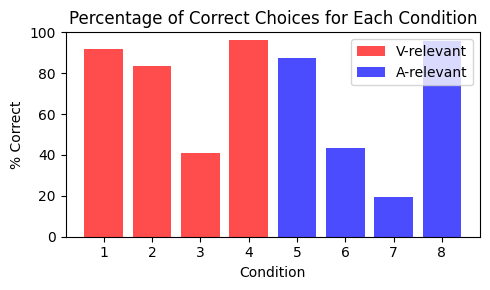

In [9]:
# Plot perc correct for each task conditions 

correct_values, condition_values, total_counts, correct_counts, percentage_correct, sorted_conditions, sorted_percentages = analysis.get_perc_correct_all_conditions(dataCell_list)
analysis.plot_perc_correct_all_conditions(sorted_conditions, sorted_percentages)

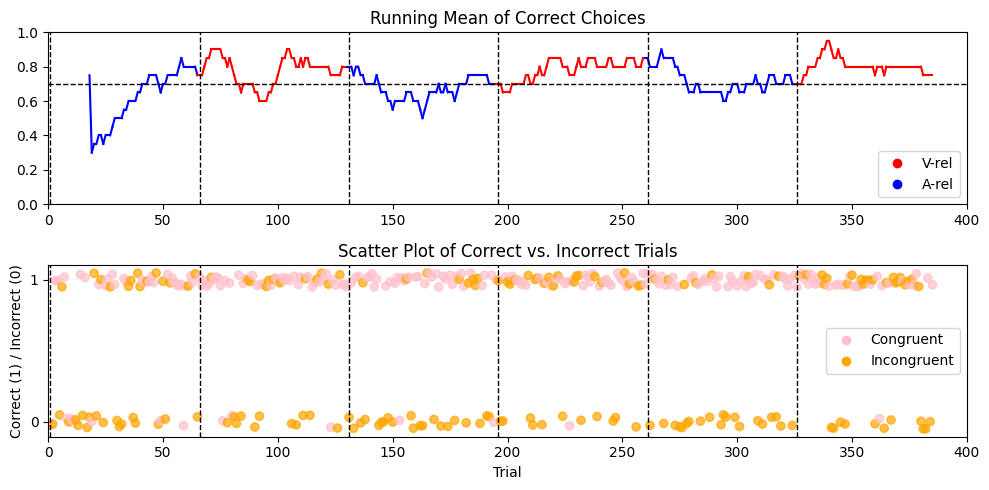

In [10]:
# Plot running mean of performance in each block + identity of correct and incorrect trials 

analysis.plot_performance(condition_values, correct_values)

In [11]:
# Extract correct/incorrect labels and trial conditions from dataCell_list
correct_labels = [trial['result']['correct'][0][0][0] for trial in dataCell_list]
trial_conditions = [trial['maze']['condition'][0][0][0] for trial in dataCell_list]

# Compute the mean x and y velocities for each trial
mean_x_velocities = np.nanmean(mov_data_list['x velocity'], axis=1)
mean_y_velocities = np.nanmean(mov_data_list['y velocity'], axis=1)

# Compute the max x and y velocities for each trial
max_x_velocities = np.nanmax(mov_data_list['x velocity'], axis=1)
max_y_velocities = np.nanmax(mov_data_list['y velocity'], axis=1)

# Create a DataFrame to hold the mean velocities, correct labels, and trial conditions
df = pd.DataFrame({
    'Mean X Velocity': mean_x_velocities,
    'Mean Y Velocity': mean_y_velocities,
    'Max X Velocity': max_x_velocities,
    'Max Y Velocity': max_y_velocities,
    'Correct': correct_labels,
    'Trial Condition': trial_conditions
})

# Convert 'Correct' and 'Trial Condition' columns to simple data types for grouping
df['Correct'] = df['Correct'].astype(int)
df['Trial Condition'] = df['Trial Condition'].astype(str)

# Group by correct labels and trial conditions and compute the mean for each group
grouped_means = df.groupby(['Correct', 'Trial Condition']).mean().reset_index()


In [12]:
correct_labels = [trial['result']['correct'][0][0][0] for trial in dataCell_list]

desired_length = 200 
X_subsampled_array, y_repeated = DC.prepare_data_for_LSTM(mov_data_list, correct_labels, desired_length)

num_trials = X_subsampled_array.shape[1]
input_shape = (num_trials,X_subsampled_array.shape[2])

model = DC.lstm_model(input_shape)
#train model 
history = model.fit(X_subsampled_array, y_repeated, epochs=100, batch_size=100)
#predict dynamic choice 
pred = model.predict(X_subsampled_array)

2023-10-06 14:55:37.545416: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Ultra
2023-10-06 14:55:37.545441: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2023-10-06 14:55:37.545450: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2023-10-06 14:55:37.545484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-06 14:55:37.545504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-10-06 14:55:39.104014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:55:39.279350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:55:39.279456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:55:42.019156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:55:42.075046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 7s 99ms/step - loss: 0.6413 - accuracy: 0.6671
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 0.6129 - accuracy: 0.7042
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 0.6036 - accuracy: 0.7171
Epoch 4/100
2/2 [==============================] - 0s 56ms/step - loss: 0.5980 - accuracy: 0.7217
Epoch 5/100
2/2 [==============================] - 0s 59ms/step - loss: 0.5938 - accuracy: 0.7227
Epoch 6/100
2/2 [==============================] - 0s 55ms/step - loss: 0.5900 - accuracy: 0.7228
Epoch 7/100
2/2 [==============================] - 0s 56ms/step - loss: 0.5865 - accuracy: 0.7228
Epoch 8/100
2/2 [==============================] - 0s 58ms/step - loss: 0.5840 - accuracy: 0.7228
Epoch 9/100
2/2 [==============================] - 0s 59ms/step - loss: 0.5838 - accuracy: 0.7228
Epoch 10/100
2/2 [==============================] - 0s 54ms/step - loss: 0.5828 - accuracy: 0.7228
Epoch 11/100
2/2 [=============

2023-10-06 14:55:55.816274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:55:55.913840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:55:55.924323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 78ms/step


2023-10-06 14:48:23.217851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:48:23.283890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 14:48:23.300119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 3s 108ms/step
